#### 数据读取-图像
- cv2.IMREAD_COLOR 彩色图像
- cv2.IMREAD_GRAYSCALE 灰度图像

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

img1 = cv2.imread("./data/lena.jpg")
img2 = cv2.imread("./data/lena.jpg", cv2.IMREAD_GRAYSCALE)

In [2]:
img1

array([[[126, 134, 223],
        [125, 133, 222],
        [124, 133, 223],
        ...,
        [126, 149, 235],
        [117, 149, 232],
        [ 85, 119, 202]],

       [[127, 137, 225],
        [126, 135, 225],
        [122, 133, 223],
        ...,
        [131, 151, 236],
        [128, 153, 233],
        [ 93, 118, 198]],

       [[124, 135, 225],
        [125, 136, 226],
        [121, 135, 224],
        ...,
        [140, 151, 233],
        [134, 144, 222],
        [ 93, 101, 178]],

       ...,

       [[ 59,  25,  90],
        [ 59,  25,  95],
        [ 59,  25,  95],
        ...,
        [ 80,  61, 148],
        [ 79,  62, 153],
        [ 80,  64, 158]],

       [[ 56,  22,  86],
        [ 58,  25,  92],
        [ 55,  21,  91],
        ...,
        [ 84,  68, 156],
        [ 85,  71, 165],
        [ 80,  67, 165]],

       [[ 51,  17,  81],
        [ 63,  28,  95],
        [ 58,  24,  94],
        ...,
        [ 85,  68, 159],
        [ 88,  76, 172],
        [ 88,  75, 177]]

In [3]:
img2

array([[160, 159, 159, ..., 172, 170, 140],
       [162, 161, 159, ..., 174, 174, 139],
       [161, 162, 160, ..., 174, 166, 123],
       ...,
       [ 48,  50,  50, ...,  89,  91,  94],
       [ 45,  49,  46, ...,  96, 101,  98],
       [ 40,  52,  49, ...,  97, 106, 107]], dtype=uint8)

#### 显示图像

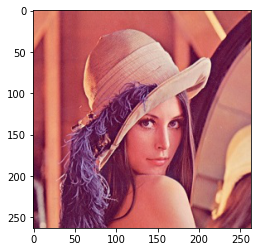

In [4]:
# BGR->RGB
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img)

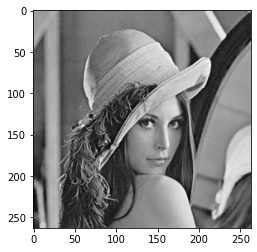

In [5]:
plt.imshow(img2, cmap="gray")

In [6]:
def imshow(window="img", img=None):
    cv2.imshow(window, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
# cv进行显示
imshow(img=img2)

In [8]:
print("H W C:")
img1.shape

H W C:


(263, 263, 3)

#### 数据读取-视频
- cv2.VideoCapture可以捕获摄像头，用来控制不同的设备，例如0，1
- 如果是视频文件，直接指定路径就好




In [9]:
vc = cv2.VideoCapture("data/video.mp4")

In [10]:
# 检查是否正确打开
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [11]:
while open:
    rel, frame = vc.read()
    if frame is None:
        break
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow("result", gray)
        if cv2.waitKey(50) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

#### 截取图像部分区域




In [12]:
img = cv2.imread("data/lena.jpg")
img = img[0:200, 0:200]
imshow(img=img)

#### 颜色通道分离

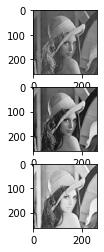

In [13]:
img = cv2.imread("data/lena.jpg")
b, g, r = cv2.split(img)
plt.subplot(311)
plt.imshow(b, cmap="gray")
plt.subplot(312)
plt.imshow(g, cmap="gray")
plt.subplot(313)
plt.imshow(r, cmap="gray")

In [14]:
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
imshow(img=cur_img)

#### 边界填充


(<AxesSubplot:title={'center':'Constant'}>,
 Text(0.5, 1.0, 'Constant'))

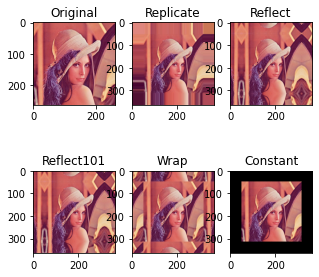

In [21]:
img = cv2.imread("data/lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

top_size, bottom_size, left_size, right_size = 50, 50, 50, 50
replicate = cv2.copyMakeBorder(img, top=top_size,
                               bottom=bottom_size,
                               left=left_size,
                               right=right_size,
                               borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top=top_size,
                             bottom=bottom_size,
                             left=left_size,
                             right=right_size,
                             borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top=top_size,
                                bottom=bottom_size,
                                left=left_size,
                                right=right_size,
                                borderType=cv2.BORDER_REFLECT101)
wrap = cv2.copyMakeBorder(img, top=top_size,
                          bottom=bottom_size,
                          left=left_size,
                          right=right_size,
                          borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top=top_size,
                              bottom=bottom_size,
                              left=left_size,
                              right=right_size,
                              borderType=cv2.BORDER_CONSTANT, value=0)
plt.figure(figsize=(5, 5))
plt.subplot(231), plt.imshow(img, cmap="gray"), plt.title("Original")
plt.subplot(232), plt.imshow(replicate, cmap="gray"), plt.title("Replicate")
plt.subplot(233), plt.imshow(reflect, cmap="gray"), plt.title("Reflect")
plt.subplot(234), plt.imshow(reflect101, cmap="gray"), plt.title("Reflect101")
plt.subplot(235), plt.imshow(wrap, cmap="gray"), plt.title("Wrap")
plt.subplot(236), plt.imshow(constant, cmap="gray"), plt.title("Constant")

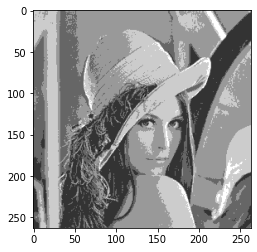

In [16]:
# 图像融合
img_add = cv2.addWeighted(r, 0.01, g, 0.01, 1)
plt.imshow(img_add, cmap="gray")

#### 图像阈值



ret,dst = cv2.threshold(src=,thresh=,maxval=,type=)
- src 输入图像,只能输入单通道
- dst 输出图像
- thresh 阈值
- maxval 当像素值超过了阈值或者小于阈值（由type决定）所赋的值
- type 二值操作的类型
    - cv2.THRESH_BINARY 大于阈值的为1 小于阈值为0
    - cv2.THRESH_BINARY_INV 大于阈值为0 小于阈值为1
    - cv2.THRESH_TRUNC 大于阈值的为阈值截断，小于阈值的不变换
    - cv2.THRESH_TOZERO 大于阈值的不改变，小于阈值的为0
    - cv2.THRESH_TOZERO_INV THRESH_TOZERO反转

In [17]:
img = cv2.imread("data/lena.jpg", cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, thresh=127, maxval=255, type=cv2.THRESH_TOZERO_INV)

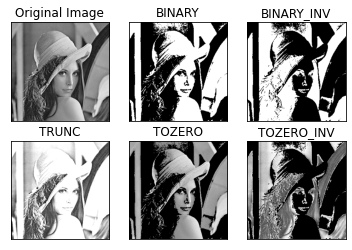

In [18]:
title = ["Original Image", "BINARY", "BINARY_INV", "TRUNC", "TOZERO", "TOZERO_INV"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], "gray")
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])

#### 平滑操作

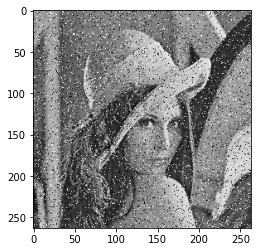

In [28]:
import random


def sp_noise(image, prob):
    '''
    添加椒盐噪声
    prob:噪声比例
    '''
    output = np.zeros(image.shape, np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output


img = cv2.imread("data/lena.jpg", cv2.IMREAD_GRAYSCALE)
img_noise = sp_noise(img, 0.05)
plt.imshow(img_noise, cmap="gray")

##### 均值滤波

In [ ]:
print("均值滤波3x3")
blur = cv2.blur(img_noise, (3, 3))
plt.figure("3x3")
plt.imshow(blur, cmap="gray")

print("均值滤波5x5")
blur = cv2.blur(img_noise, (5, 5))
plt.figure("5x5")
plt.imshow(blur, cmap="gray")

##### 方框滤波

方框滤波3x3


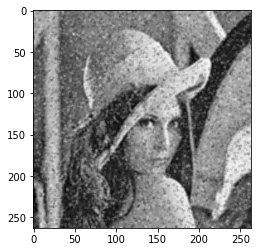

In [45]:
print("方框滤波3x3")
box = cv2.boxFilter(img_noise, -1, (3, 3), normalize=True)
plt.figure("3x3")
plt.imshow(box, cmap="gray")

方框滤波3x3


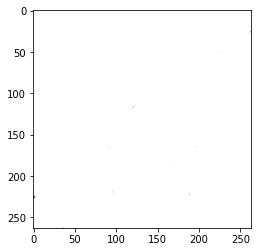

In [38]:
print("方框滤波3x3")
# 容易越界
box1 = cv2.boxFilter(img_noise, -1, (3, 3), normalize=False)
plt.figure("3x3")
plt.imshow(box1, cmap="gray")

高斯滤波3x3


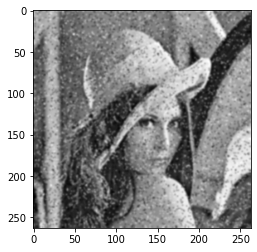

In [37]:
print("高斯滤波3x3")
gaussian = cv2.GaussianBlur(img_noise, (5, 5), sigmaX=1)
plt.figure("3x3")
plt.imshow(gaussian, cmap="gray")

中值滤波3x3


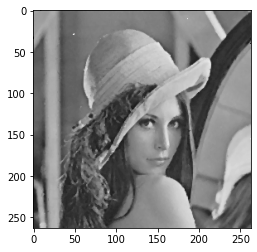

In [42]:
print("中值滤波3x3")
median = cv2.medianBlur(img_noise, 3)
plt.figure("3x3")
plt.imshow(median, cmap="gray")

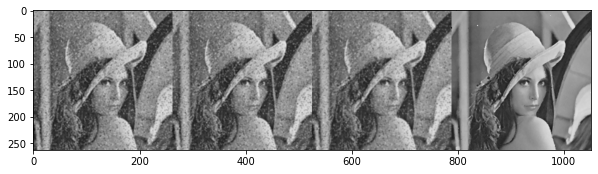

In [49]:
# 显示所有
res = np.hstack((blur, box, gaussian, median))
plt.figure(figsize=(10, 10))
plt.imshow(res, cmap="gray")

